In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def activate(x, w, b):
  return (predict(x,w,b) > 0).astype('int')

def predict(x, w, b):
  return np.matmul(x, w) + b

def loss(y_star, y):
  return np.sum(np.power(y_star - y, 2)) * (1/y.shape[0])

def loss_cross_entropy(y_star, y):
  return -np.sum( y * np.log(1e-15 + y_star) + (1 - y)*np.log((1 - y_star)+1e-15) )

def update_wb(prediction, x, y, w, b, learning_rate=0.001):
  w_star = w - (1/y.shape[0]) * x.T.dot(prediction - y) * learning_rate

  b_star = b - (1/y.shape[0]) * np.sum(prediction-y) * learning_rate
  
  return w_star, b_star

In [3]:
print("Truth: 0, Prediction: 0, Loss: {:.3f}".format(loss_cross_entropy(0, 0)))
print("Truth: 0, Prediction: 1, Loss: {:.3f}".format(loss_cross_entropy(0, 1)))
print("Truth: 1, Prediction: 0, Loss: {:.3f}".format(loss_cross_entropy(1, 0)))
print("Truth: 1, Prediction: 1, Loss: {:.3f}".format(loss_cross_entropy(1, 1)))

Truth: 0, Prediction: 0, Loss: -0.000
Truth: 0, Prediction: 1, Loss: 34.539
Truth: 1, Prediction: 0, Loss: 34.539
Truth: 1, Prediction: 1, Loss: -0.000


In [25]:
N = 500

c = np.random.randn() + 1.0

x1 = np.random.randn(N, 2) + c 
x2 = np.random.randn(N, 2) - c

x = np.concatenate([x1, x2], axis=0)
y = np.concatenate([np.zeros((x1.shape[0],)), np.ones((x2.shape[0],))])

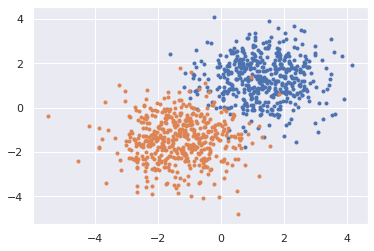

In [26]:
plt.plot(x1[:,0], x1[:,1], '.')
plt.plot(x2[:,0], x2[:,1], '.')

In [27]:
shuffle_idx = np.arange(x.shape[0])
np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

TRAIN_RATIO = 0.7
N_TRAIN = int(x.shape[0]*TRAIN_RATIO)

x_train = x[0:N_TRAIN, :]
y_train= y[0:N_TRAIN]

x_test = x[N_TRAIN:,:]
y_test = y[N_TRAIN:]

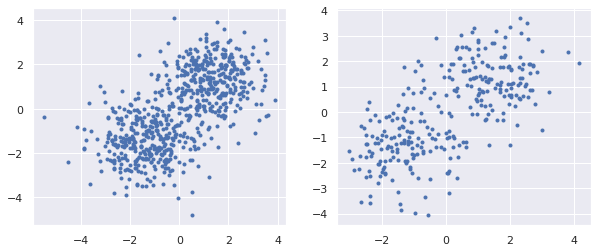

In [28]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_train[:,0], x_train[:,1], '.')

plt.subplot(1,2,2)
plt.plot(x_test[:,0], x_test[:,1], '.')

In [41]:
learning_rate = 0.01

# w, b 초기화
w = np.random.randn(2,)
b = np.random.randn()

w_list = []
b_list = []
loss_list = []

for i in range(1000):
  prediction = activate(x_train, w, b)

  loss_list.append( loss_cross_entropy(prediction, y_train) )
  w_list.append(w)
  b_list.append(b)

  w,b = update_wb(prediction, x_train, y_train, w,b, learning_rate=learning_rate)

print('Train Accuracy %.2f'% (1-loss(prediction, y_train)))
print('Test Accuracy %.2f'% (1-loss(activate(x_test,w,b), y_test)))

w_list = np.array(w_list)
b_list = np.array(b_list)
loss_list = np.array(loss_list)

Train Accuracy 0.93
Test Accuracy 0.95


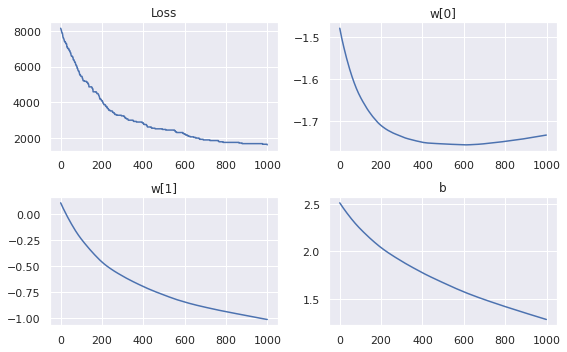

In [42]:
plt.figure(figsize=(8,5))
plt.subplot(2,2, 1)
plt.plot(loss_list)
plt.title('Loss')

plt.subplot(2,2, 2)
plt.plot(w_list[:,0])
plt.title('w[0]')

plt.subplot(2,2, 3)
plt.plot(w_list[:,1])
plt.title('w[1]')

plt.subplot(2,2, 4)
plt.plot(b_list)
plt.title('b')

plt.tight_layout()

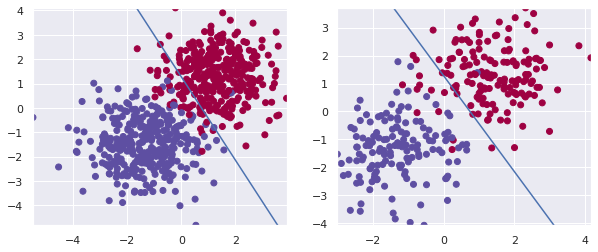

In [43]:
slope = (-w[0] / w[1])
intercept = (-b / w[1])

s1 = x_train.min()
e1 = x_train.max()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='Spectral')
plt.plot(np.linspace(s1, e1, 100),  np.linspace(s1, e1, 100) * slope + intercept )
plt.axis([x_train[:,0].min(), x_train[:,0].max(), x_train[:,1].min(), x_train[:,1].max()])

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Spectral')
plt.plot(np.linspace(s1, e1, 100),  np.linspace(s1, e1, 100) * slope + intercept )

plt.axis([x_test[:,0].min(), x_test[:,0].max(), x_test[:,1].min(), x_test[:,1].max()])

plt.show()